In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
insurance = pd.read_csv("data/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance["sex"] = insurance["sex"].astype("category")
insurance["smoker"] = insurance["smoker"].astype("category")
insurance["region"] = insurance["region"].astype("category")

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [6]:
X = insurance.drop("charges",axis=1)
y = insurance["charges"]

In [7]:
X.shape, y.shape

((1338, 6), (1338,))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
len(X), len(X_train), len(X_test) 

(1338, 1070, 268)

In [10]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

ct = make_column_transformer(
    (OneHotEncoder(), ["sex","smoker","region"]),
    (MinMaxScaler(), ["age","bmi","children"])
)

In [11]:
ct.fit(X_train)

X_train_scaled = ct.transform(X_train)
X_test_scaled = ct.transform(X_test)

In [12]:
X_train_scaled

array([[1.        , 0.        , 1.        , ..., 0.60869565, 0.10734463,
        0.4       ],
       [1.        , 0.        , 1.        , ..., 0.63043478, 0.22491256,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.73913043, 0.23944041,
        0.        ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.86956522, 0.24791499,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.41304348, 0.85122411,
        0.4       ],
       [0.        , 1.        , 1.        , ..., 0.80434783, 0.37503363,
        0.        ]])

In [13]:
def evaluation_plot(history_name):
  plt.figure(figsize=(10,7))
  pd.DataFrame(history_name.history).plot()
  plt.xlabel("Epochs")
  plt.ylabel("Loss Function")
  plt.legend();

In [14]:
def mse(y_test,y_pred):
  return tf.keras.metrics.mean_squared_error(y_test,y_pred)

def mae(y_test,y_pred):
  return tf.keras.metrics.mean_absolute_error(y_test,y_pred)
  

# First Model

In [15]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)   
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

history_1 = model_1.fit(X_train_scaled,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13345.5713 - mae: 13345.5713
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.3994 - mae: 13345.3994
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13345.2324 - mae: 13345.2324
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13345.0635 - mae: 13345.0635
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13344.8945 - mae: 13344.8945
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13344.7236 - mae: 13344.7236
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 13344.5537 - mae: 13344.5537
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 13344.3828 - mae: 13344.3828
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 13344.2148 - mae: 13344.2148
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13344.04

34/34 [==============================] - 0s 1ms/step - loss: 13332.1533 - mae: 13332.1533
Epoch 81/100
34/34 [==============================] - 0s 1ms/step - loss: 13331.9814 - mae: 13331.9814
Epoch 82/100
34/34 [==============================] - 0s 1ms/step - loss: 13331.8125 - mae: 13331.8125
Epoch 83/100
34/34 [==============================] - 0s 1ms/step - loss: 13331.6416 - mae: 13331.6416
Epoch 84/100
34/34 [==============================] - 0s 1ms/step - loss: 13331.4727 - mae: 13331.4727
Epoch 85/100
34/34 [==============================] - 0s 1ms/step - loss: 13331.3018 - mae: 13331.3018
Epoch 86/100
34/34 [==============================] - 0s 1ms/step - loss: 13331.1357 - mae: 13331.1357
Epoch 87/100
34/34 [==============================] - 0s 1ms/step - loss: 13330.9629 - mae: 13330.9629
Epoch 88/100
34/34 [==============================] - 0s 1ms/step - loss: 13330.7939 - mae: 13330.7939
Epoch 89/100
34/34 [==============================] - 0s 1ms/step - loss: 13330.6240 -

In [16]:
model_1.evaluate(X_test_scaled,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 12950.9424 - mae: 12950.9424


[12950.9423828125, 12950.9423828125]

In [17]:
y_pred_1 = model_1.predict(X_test_scaled)
y_pred_1

9/9 [==============================] - 0s 1ms/step


array([[17.866367 ],
       [16.462666 ],
       [18.693806 ],
       [18.51205  ],
       [15.866396 ],
       [17.981262 ],
       [14.377802 ],
       [19.555904 ],
       [14.676601 ],
       [19.047226 ],
       [17.225868 ],
       [18.09388  ],
       [16.234947 ],
       [20.44577  ],
       [19.778713 ],
       [19.638062 ],
       [19.660301 ],
       [18.745483 ],
       [17.386286 ],
       [17.075222 ],
       [17.457981 ],
       [18.144728 ],
       [15.002177 ],
       [16.537895 ],
       [18.944149 ],
       [18.268944 ],
       [18.526024 ],
       [17.40673  ],
       [18.167591 ],
       [15.032366 ],
       [18.517271 ],
       [18.26754  ],
       [15.630445 ],
       [16.559423 ],
       [16.033264 ],
       [18.431957 ],
       [15.15501  ],
       [17.211899 ],
       [18.017403 ],
       [17.871391 ],
       [17.359283 ],
       [16.175045 ],
       [18.822811 ],
       [17.886091 ],
       [17.833181 ],
       [18.318727 ],
       [16.7448   ],
       [16.31

<Figure size 1000x700 with 0 Axes>

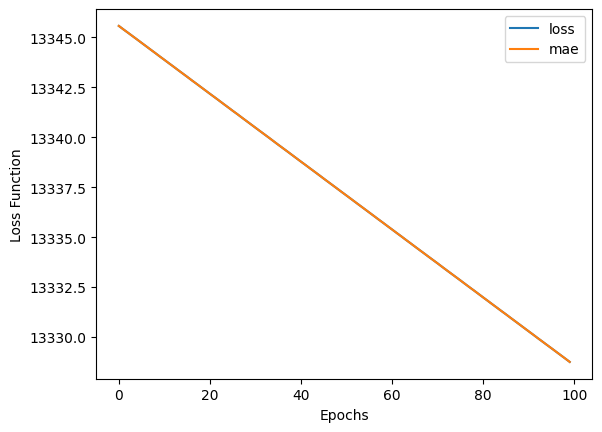

In [18]:
evaluation_plot(history_1)

In [19]:
mae_1 = mae(y_test,tf.squeeze(y_pred_1)).numpy()
mse_1 = mse(y_test, tf.squeeze(y_pred_1)).numpy()

In [20]:
mae_1,mse_1

(12950.944, 322958370.0)

# Second Model

In [21]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["mae"])

history_2 = model_2.fit(X_train_scaled,y_train, epochs=100)

Epoch 1/100


C:\Users\91812\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


34/34 [==============================] - 0s 2ms/step - loss: 13343.9902 - mae: 13343.9902
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13336.6367 - mae: 13336.6367
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13317.2441 - mae: 13317.2441
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13275.3350 - mae: 13275.3350
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13200.1895 - mae: 13200.1895
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13081.2988 - mae: 13081.2988
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12907.9600 - mae: 12907.9600
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12669.9941 - mae: 12669.9941
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12357.2529 - mae: 12357.2529
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11964.1191 - mae: 11

34/34 [==============================] - 0s 2ms/step - loss: 3674.6470 - mae: 3674.6470
Epoch 83/100
34/34 [==============================] - 0s 2ms/step - loss: 3670.5493 - mae: 3670.5493
Epoch 84/100
34/34 [==============================] - 0s 2ms/step - loss: 3665.9316 - mae: 3665.9316
Epoch 85/100
34/34 [==============================] - 0s 2ms/step - loss: 3664.4963 - mae: 3664.4963
Epoch 86/100
34/34 [==============================] - 0s 2ms/step - loss: 3660.2815 - mae: 3660.2815
Epoch 87/100
34/34 [==============================] - 0s 2ms/step - loss: 3659.4548 - mae: 3659.4548
Epoch 88/100
34/34 [==============================] - 0s 2ms/step - loss: 3657.2310 - mae: 3657.2310
Epoch 89/100
34/34 [==============================] - 0s 2ms/step - loss: 3654.2683 - mae: 3654.2683
Epoch 90/100
34/34 [==============================] - 0s 2ms/step - loss: 3655.0796 - mae: 3655.0796
Epoch 91/100
34/34 [==============================] - 0s 2ms/step - loss: 3650.5972 - mae: 3650.5972
Epo

In [22]:
model_2.evaluate(X_test_scaled,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3442.3926 - mae: 3442.3926


[3442.392578125, 3442.392578125]

In [23]:
y_pred_2 = model_2.predict(X_test_scaled)
y_pred_2

9/9 [==============================] - 0s 1ms/step


array([[ 9357.51   ],
       [ 6048.176  ],
       [34219.52   ],
       [ 9220.054  ],
       [21956.129  ],
       [ 5787.729  ],
       [ 1070.3718 ],
       [13502.957  ],
       [ 3541.3462 ],
       [10189.904  ],
       [25336.184  ],
       [ 7745.3384 ],
       [ 4261.7163 ],
       [30708.111  ],
       [33152.797  ],
       [30375.207  ],
       [10766.749  ],
       [30327.906  ],
       [ 8729.3125 ],
       [28593.414  ],
       [ 3938.6467 ],
       [ 8026.381  ],
       [  655.5258 ],
       [ 3203.905  ],
       [10917.125  ],
       [11375.112  ],
       [12396.402  ],
       [ 4883.811  ],
       [ 9973.711  ],
       [  445.80728],
       [ 8344.895  ],
       [11776.096  ],
       [ 2007.8082 ],
       [ 5098.0806 ],
       [ 2916.7932 ],
       [ 8874.364  ],
       [ 1865.641  ],
       [ 7957.0815 ],
       [31257.664  ],
       [26808.775  ],
       [ 3087.768  ],
       [ 2289.4607 ],
       [11772.712  ],
       [11461.417  ],
       [ 5597.8247 ],
       [11

<Figure size 1000x700 with 0 Axes>

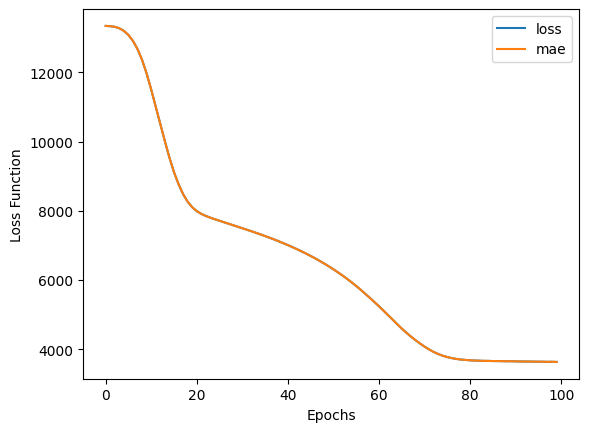

In [24]:
evaluation_plot(history_2)

In [25]:
mae_2 = mae(y_test,tf.squeeze(y_pred_2)).numpy()
mse_2 = mse(y_test,tf.squeeze(y_pred_2)).numpy()

mae_2,mse_2

(3442.3923, 41867284.0)

# Third Model

In [26]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(lr=0.0001),
                metrics=["mae"])

history_3 = model_3.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200


C:\Users\91812\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


34/34 [==============================] - 0s 2ms/step - loss: 13345.5234 - mae: 13345.5234
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13345.4443 - mae: 13345.4443
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13345.3652 - mae: 13345.3652
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13345.2852 - mae: 13345.2852
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13345.2012 - mae: 13345.2012
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13345.1172 - mae: 13345.1172
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 13345.0361 - mae: 13345.0361
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 13344.9463 - mae: 13344.9463
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 13344.8574 - mae: 13344.8574
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 13344.7656 - mae: 13

34/34 [==============================] - 0s 2ms/step - loss: 11948.6689 - mae: 11948.6689
Epoch 81/200
34/34 [==============================] - 0s 1ms/step - loss: 10749.1494 - mae: 10749.1494
Epoch 82/200
34/34 [==============================] - 0s 2ms/step - loss: 9156.6387 - mae: 9156.6387
Epoch 83/200
34/34 [==============================] - 0s 2ms/step - loss: 8337.1719 - mae: 8337.1719
Epoch 84/200
34/34 [==============================] - 0s 2ms/step - loss: 8148.3896 - mae: 8148.3896
Epoch 85/200
34/34 [==============================] - 0s 2ms/step - loss: 7993.4980 - mae: 7993.4980
Epoch 86/200
34/34 [==============================] - 0s 2ms/step - loss: 7821.9639 - mae: 7821.9639
Epoch 87/200
34/34 [==============================] - 0s 2ms/step - loss: 7626.8223 - mae: 7626.8223
Epoch 88/200
34/34 [==============================] - 0s 2ms/step - loss: 7390.2803 - mae: 7390.2803
Epoch 89/200
34/34 [==============================] - 0s 2ms/step - loss: 7112.1748 - mae: 7112.1748

34/34 [==============================] - 0s 2ms/step - loss: 3504.1582 - mae: 3504.1582
Epoch 161/200
34/34 [==============================] - 0s 2ms/step - loss: 3521.1213 - mae: 3521.1213
Epoch 162/200
34/34 [==============================] - 0s 2ms/step - loss: 3518.6892 - mae: 3518.6892
Epoch 163/200
34/34 [==============================] - 0s 2ms/step - loss: 3519.7234 - mae: 3519.7234
Epoch 164/200
34/34 [==============================] - 0s 2ms/step - loss: 3508.8123 - mae: 3508.8123
Epoch 165/200
34/34 [==============================] - 0s 2ms/step - loss: 3514.7146 - mae: 3514.7146
Epoch 166/200
34/34 [==============================] - 0s 5ms/step - loss: 3508.9814 - mae: 3508.9814
Epoch 167/200
34/34 [==============================] - 0s 3ms/step - loss: 3516.0137 - mae: 3516.0137
Epoch 168/200
34/34 [==============================] - 0s 2ms/step - loss: 3504.3462 - mae: 3504.3462
Epoch 169/200
34/34 [==============================] - 0s 2ms/step - loss: 3515.0186 - mae: 3515

In [27]:
model_3.evaluate(X_test_scaled, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3177.6221 - mae: 3177.6221


[3177.6220703125, 3177.6220703125]

In [28]:
y_pred_3 = model_3.predict(X_test_scaled)

9/9 [==============================] - 0s 1ms/step


In [29]:
y_pred_3

array([[ 9291.516  ],
       [ 5981.133  ],
       [44960.117  ],
       [ 9280.234  ],
       [32852.305  ],
       [ 5831.299  ],
       [ 1073.3969 ],
       [13459.529  ],
       [ 3544.1387 ],
       [10228.401  ],
       [36329.867  ],
       [ 7783.8457 ],
       [ 4306.235  ],
       [41603.04   ],
       [44028.586  ],
       [41286.426  ],
       [10706.069  ],
       [41137.395  ],
       [ 8755.774  ],
       [39367.266  ],
       [ 4112.6406 ],
       [ 8116.6577 ],
       [  792.986  ],
       [ 3086.7373 ],
       [10844.038  ],
       [11248.25   ],
       [12328.649  ],
       [ 4834.028  ],
       [ 9896.3545 ],
       [  616.126  ],
       [ 8349.082  ],
       [11665.428  ],
       [ 2032.9014 ],
       [ 5103.6343 ],
       [ 3047.2021 ],
       [ 8834.0625 ],
       [ 1911.3875 ],
       [ 7947.8726 ],
       [42034.84   ],
       [37757.184  ],
       [ 3130.957  ],
       [ 2351.9458 ],
       [11708.997  ],
       [11497.459  ],
       [ 5715.602  ],
       [11

<Figure size 1000x700 with 0 Axes>

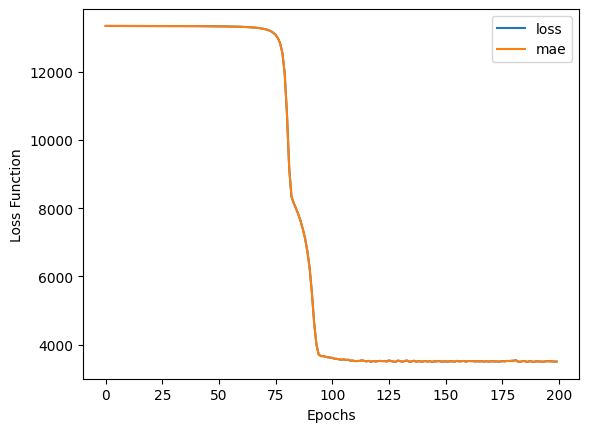

In [30]:
evaluation_plot(history_3)


In [31]:
mae_3 = mae(y_test,tf.squeeze(y_pred_3)).numpy()
mse_3 = mse(y_test,tf.squeeze(y_pred_3)).numpy()


In [32]:
len(model_2.layers)

3

# Comparing Different Models Created

In [33]:
comparison_list = [["Model_1",mae_1,mse_1,"Adam",len(model_1.layers)],
                   ["Model_2",mae_2,mse_2,"Adam",len(model_2.layers)],
                   ["Model_3",mae_3,mse_3,"SGD",len(model_3.layers)]]


comparison_df = pd.DataFrame(comparison_list, columns=["ModelName","MeanAbsoluteError","MeanSquaredError","Optimizer", "NumberofLayers"])
comparison_df.set_index("ModelName",inplace=True)

comparison_df



,MeanAbsoluteError,MeanSquaredError,Optimizer,NumberofLayers
ModelName,,,,
Model_1,12950.944336,322958368.0,Adam,1
Model_2,3442.392334,41867284.0,Adam,3
Model_3,3177.621826,44270860.0,SGD,4


In [34]:
model_3.save("First_Saved_Model")

INFO:tensorflow:Assets written to: First_Saved_Model\assets
